Aplicar o PCA, limpar correlações ruins com Price, Escrever um modelo manualmente(SVR, KNN, Linear)

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Open file

In [89]:
df = pd.read_csv('books_corpus.csv', delimiter=',')
df


,author,title,genre,num_pages,year,publisher,language,version,price
0,Jane Austen,Pride and Prejudice,Romance,4482,2003,Penguin Classics,English,Paperback,2.49
1,Jane Austen,Pride and Prejudice,Romance,4482,2003,Penguin Classics,English,Kindle,0.75
2,Jane Austen,Sense and Sensibility,Romance,368,2003,Penguin Classics,English,Paperback,7.35
3,Jane Austen,Sense and Sensibility,Romance,368,2003,Penguin Classics,English,Kindle,0.75
4,Jane Austen,Emma,Romance,512,2015,Penguin Classics,English,Paperback,10.99
...,...,...,...,...,...,...,...,...,...
595,Charles Dickens,Bleak House,Novel,789,2023,NTMC,English,Kindle,2.99
596,Charles Dickens,A Christmas Carol,Novella,70,2016,Independent Publishing,English,Paperback,6.30
597,Charles Dickens,A Christmas Carol,Novella,120,2016,Independent Publishing,English,Kindle,0.49
598,Charles Dickens,Hard Times,Novel,384,2012,William Collins,English,Paperback,2.99


In [90]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   author     600 non-null    object 
 1   title      600 non-null    object 
 2   genre      600 non-null    object 
 3   num_pages  600 non-null    int64  
 4   year       600 non-null    int64  
 5   publisher  600 non-null    object 
 6   language   600 non-null    object 
 7   version    600 non-null    object 
 8   price      600 non-null    float64
dtypes: float64(1), int64(2), object(6)
memory usage: 42.3+ KB


# Pre processing

In [91]:
df.head()


,author,title,genre,num_pages,year,publisher,language,version,price
0,Jane Austen,Pride and Prejudice,Romance,4482,2003,Penguin Classics,English,Paperback,2.49
1,Jane Austen,Pride and Prejudice,Romance,4482,2003,Penguin Classics,English,Kindle,0.75
2,Jane Austen,Sense and Sensibility,Romance,368,2003,Penguin Classics,English,Paperback,7.35
3,Jane Austen,Sense and Sensibility,Romance,368,2003,Penguin Classics,English,Kindle,0.75
4,Jane Austen,Emma,Romance,512,2015,Penguin Classics,English,Paperback,10.99


In [92]:
df.sample(20)


,author,title,genre,num_pages,year,publisher,language,version,price
109,Colleen Hoover,Maybe Someday,Contemporary Romance,377,2014,Simon & Schuster UK,English,Kindle,5.99
274,Judith Butler,The Force of Nonviolence: An Ethico-Political ...,Gender Studies,225,2020,Verso,English,Kindle,7.50
199,Michelle Obama,Michelle Obama: First Lady of Hope,Biography,240,2008,yons Press,English,Kindle,7.81
429,Elie Wiesel,A Beggar in Jerusalem,Memoir,224,1997,Schocken Books,English,Paperback,7.38
447,Veronica Roth,Divergent,Dystopian,362,2011,HarperCollinsChildren’sBooks,English,Kindle,2.99
457,Veronica Roth,The Fates Divide,Dystopian,469,2018,HarperCollinsChildren’sBooks,English,Kindle,2.99
292,Cornel West,Black Prophetic Fire,African American Studies,264,2015,Beacon Press,English,Paperback,12.85
155,Malcolm Gladwell,Outliers: The Story of Success,Non-Fiction,288,2008,Penguin,English,Kindle,5.49
101,Colleen Hoover,November 9,Contemporary Romance,352,2015,Simon & Schuster UK,English,Kindle,5.99
268,Judith Butler,Undoing Gender,Gender Studies,288,2004,Routledge,English,Paperback,34.99


In [93]:
df.describe(include = 'all').head(2)

,author,title,genre,num_pages,year,publisher,language,version,price
count,600,600,600,600.00,600.00,600,600,600,600.00
unique,51,324,31,NaN,NaN,127,3,6,NaN


## Price column type

In [94]:
#df.price.astype(float)


## Num_pages column

In [95]:
#num_pages = df.num_pages.str.split(pat=(" "), expand=True).loc[:, 0]
#num_pages = num_pages.astype(int)


In [96]:
#df.num_pages = num_pages
#df


# Typo Error Handling

In [97]:
df.language.value_counts()


English    585
Englih      13
Englihs      2
Name: language, dtype: int64

In [98]:
df.language.loc[df.language != 'English'] = 'English'  # atenção
df.version.loc[df.version == 'kindle'] = 'Kindle'
df.version.loc[df.version == 'Kinde'] = 'Kindle'
df.version.loc[df.version == 'Kindke'] = 'Kindle'
df.version.loc[df.version == 'Kinlde'] = 'Kindle'


In [99]:
author = df.author.value_counts()
genre = df.genre.value_counts()
publisher = df.publisher.value_counts()
print(len(author))
print(len(genre))
print(len(publisher))

51
31
127


In [100]:
df.author.loc[df.author == 'rthur Conan Doyle'] = 'Arthur Conan Doyle'


# Checking null values

In [101]:
df.isnull().sum()


author       0
title        0
genre        0
num_pages    0
year         0
publisher    0
language     0
version      0
price        0
dtype: int64

# Graph

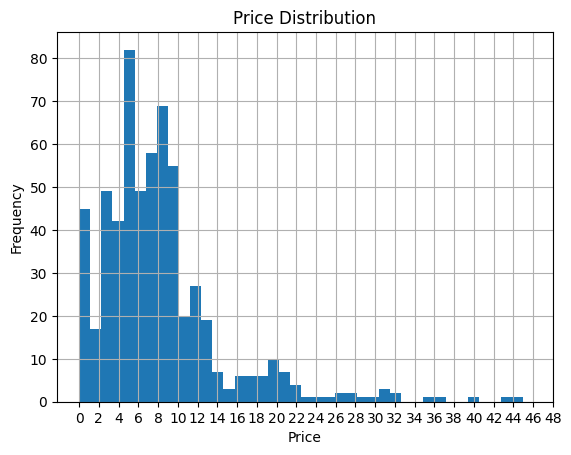

In [102]:
plt.hist(df.price, bins=40)
plt.title('Price distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xticks(range(0, 50, 2))
plt.title('Price Distribution')
plt.grid()
plt.show()


# Author distribution

In [103]:
len(df.author.unique())


51

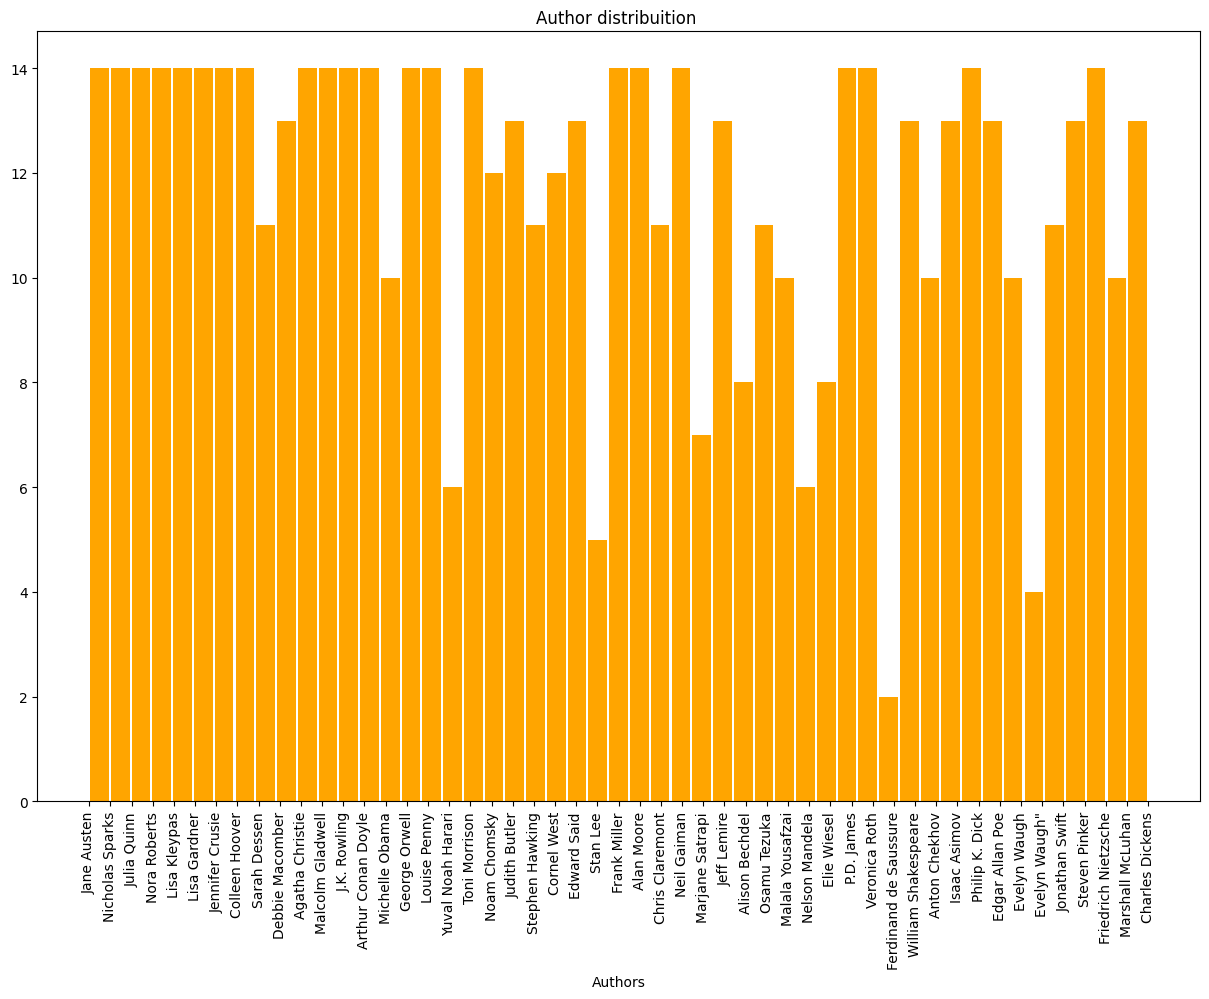

In [104]:
fig = plt.figure(figsize=(15,10))
plt.hist(df.author, bins=len(df.author.unique()), rwidth=0.9, color='orange')
plt.xticks(rotation=90)
plt.xlabel('Authors')
plt.title('Author distribuition ')
plt.show()


## Genre dis

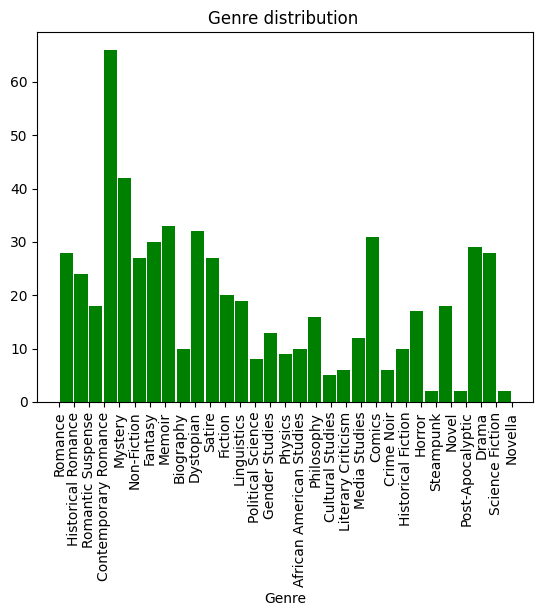

In [105]:
plt.hist(df.genre, bins=len(df.genre.unique()), rwidth=0.9, color='green')
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.title('Genre distribution ')
plt.show()


## Num pages dist

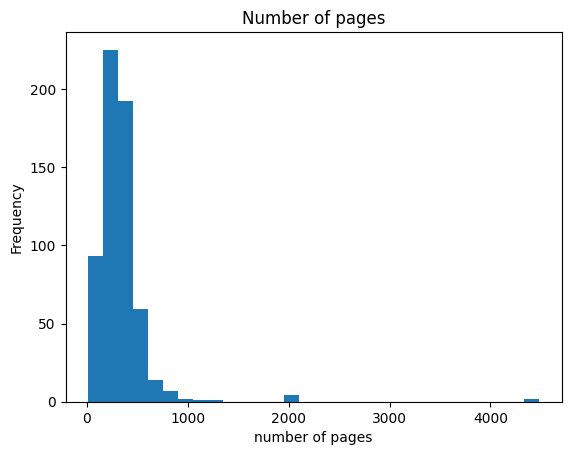

In [106]:
plt.hist(df.num_pages, bins=30)
plt.title('Number of pages')
plt.xlabel('number of pages')
plt.ylabel('Frequency')
plt.show()


# Correlation

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   author     600 non-null    object 
 1   title      600 non-null    object 
 2   genre      600 non-null    object 
 3   num_pages  600 non-null    int64  
 4   year       600 non-null    int64  
 5   publisher  600 non-null    object 
 6   language   600 non-null    object 
 7   version    600 non-null    object 
 8   price      600 non-null    float64
dtypes: float64(1), int64(2), object(6)
memory usage: 42.3+ KB


In [108]:
df.corr()


,num_pages,year,price
num_pages,1.00,-0.04,-0.03
year,-0.04,1.00,-0.25
price,-0.03,-0.25,1.00


# Aggregations

max, min, mean, median, frequency, std

In [109]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   author     600 non-null    object 
 1   title      600 non-null    object 
 2   genre      600 non-null    object 
 3   num_pages  600 non-null    int64  
 4   year       600 non-null    int64  
 5   publisher  600 non-null    object 
 6   language   600 non-null    object 
 7   version    600 non-null    object 
 8   price      600 non-null    float64
dtypes: float64(1), int64(2), object(6)
memory usage: 42.3+ KB


## Genre and Number of Pages 

### Mean

In [110]:
relation_g_np = df.groupby(['genre'])['num_pages',"price"].mean()
relation_g_np = relation_g_np.sort_index()
#relation_g_np.plot.bar()
#plt.show()

pd.DataFrame(relation_g_np)


,num_pages,price
genre,,
African American Studies,233.30,12.93
Biography,216.40,11.50
Comics,239.45,15.19
Contemporary Romance,362.41,7.36
Crime Noir,805.33,15.44
Cultural Studies,365.00,10.76
Drama,224.59,4.78
Dystopian,405.22,6.47
Fantasy,456.03,6.54


### Max

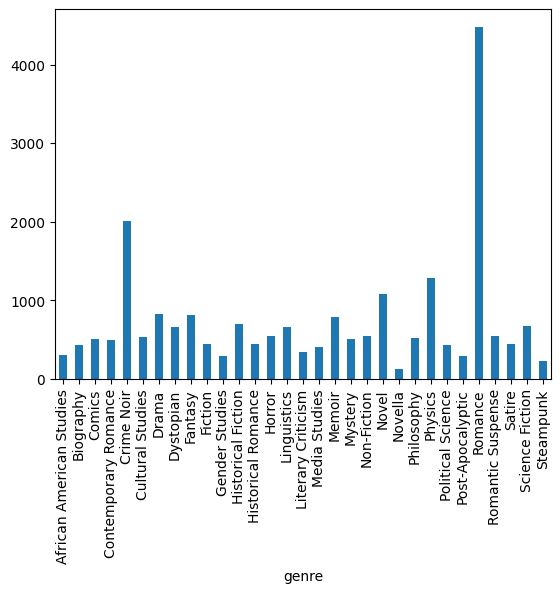

In [111]:
relation_g_np = df.groupby('genre')["num_pages"].max()
relation_g_np = relation_g_np.sort_index()
relation_g_np.plot.bar()
plt.show()


### Min

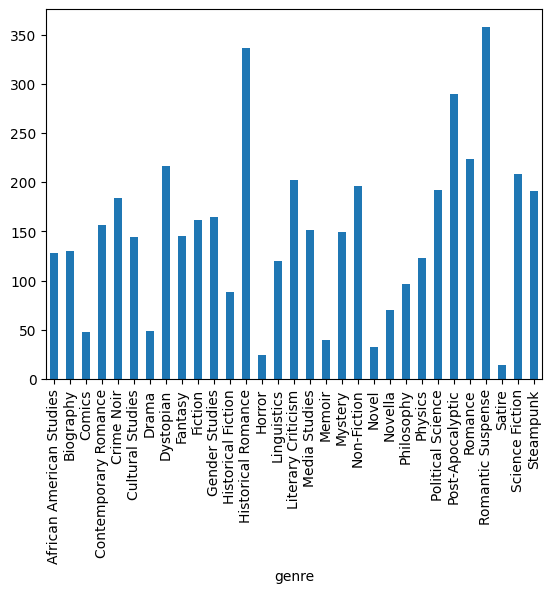

In [112]:
relation_g_np = df.groupby('genre')["num_pages"].min()
relation_g_np = relation_g_np.sort_index()
relation_g_np.plot.bar()
plt.show()


### Median

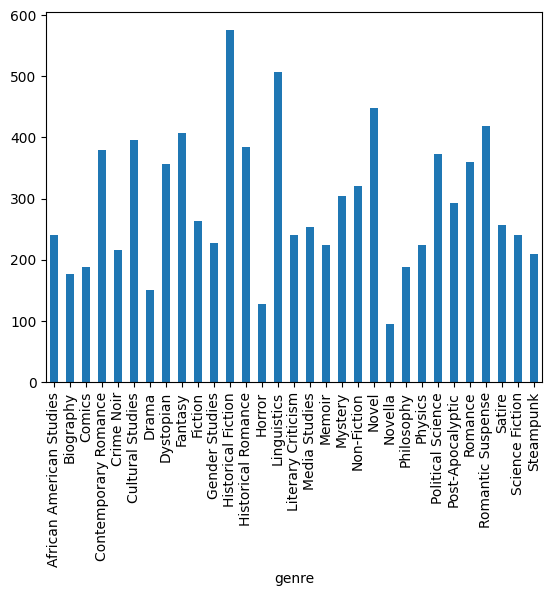

In [113]:
relation_g_np = df.groupby('genre')["num_pages"].median()
relation_g_np = relation_g_np.sort_index()
relation_g_np.plot.bar()
plt.show()


### std

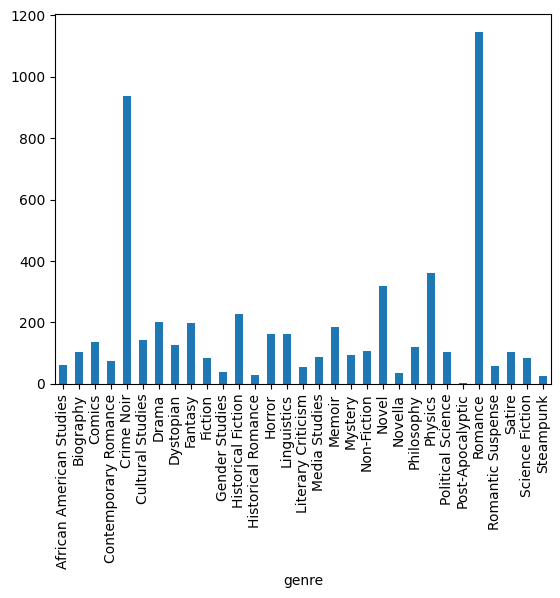

In [114]:
relation_g_np = df.groupby('genre')["num_pages"].std()
relation_g_np = relation_g_np.sort_index()
relation_g_np.plot.bar()
plt.show()


## Genre and Price

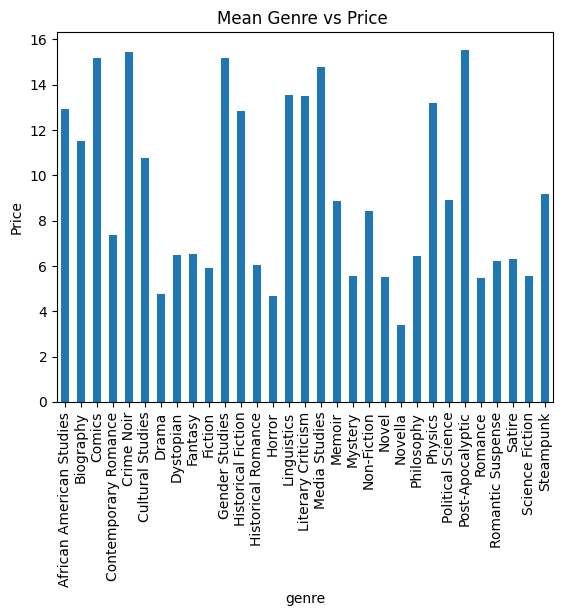

In [115]:
relation_g_p = df.groupby('genre')["price"].mean()
relation_g_p = relation_g_p.sort_index()
relation_g_p.plot.bar()
plt.ylabel('Price')
plt.title('Mean Genre vs Price ')
plt.show()




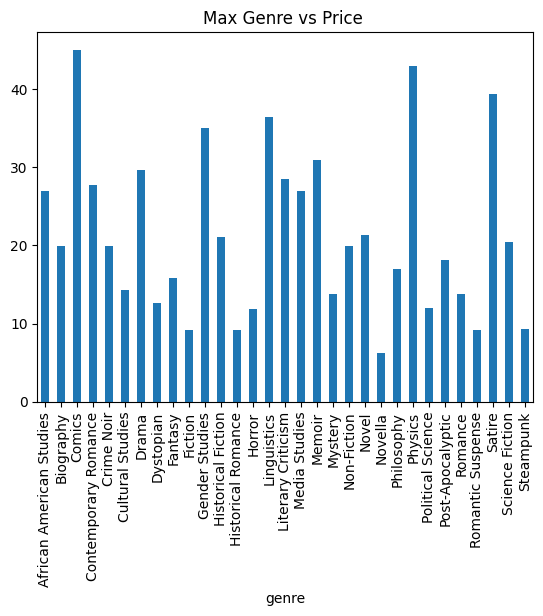

In [116]:
relation_g_p = df.groupby('genre')["price"].max()
relation_g_p = relation_g_p.sort_index()
relation_g_p.plot.bar()
plt.title('Max Genre vs Price ')
plt.show()


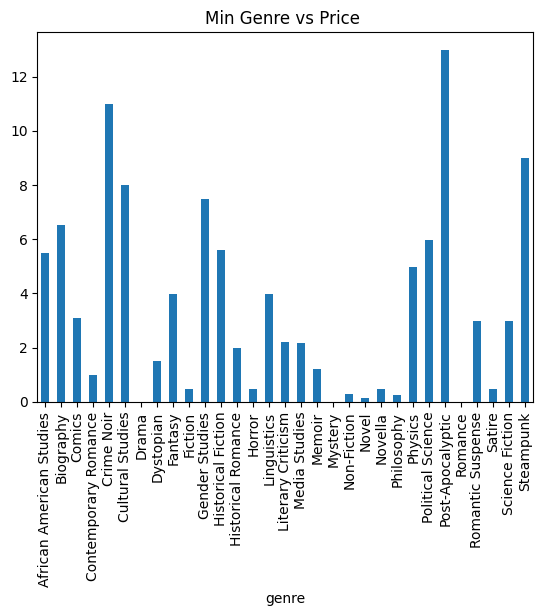

In [117]:

relation_g_p = df.groupby('genre')["price"].min()
relation_g_p = relation_g_p.sort_index()
relation_g_p.plot.bar()
plt.title('Min Genre vs Price ')
plt.show()

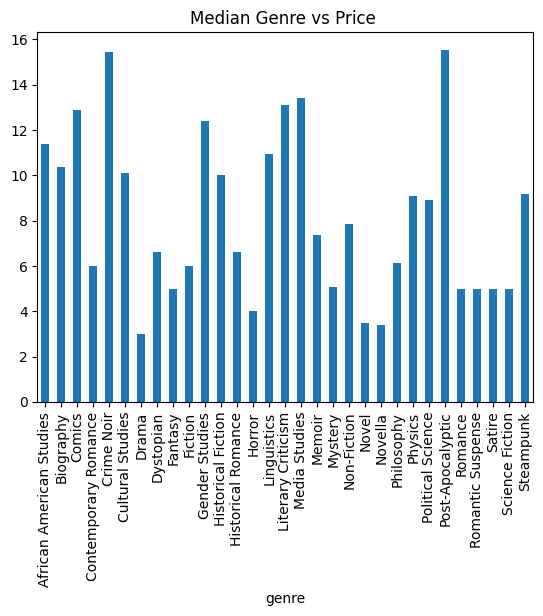

In [118]:
relation_g_p = df.groupby('genre')["price"].median()
relation_g_p = relation_g_p.sort_index()
relation_g_p.plot.bar()
plt.title('Median Genre vs Price ')
plt.show()


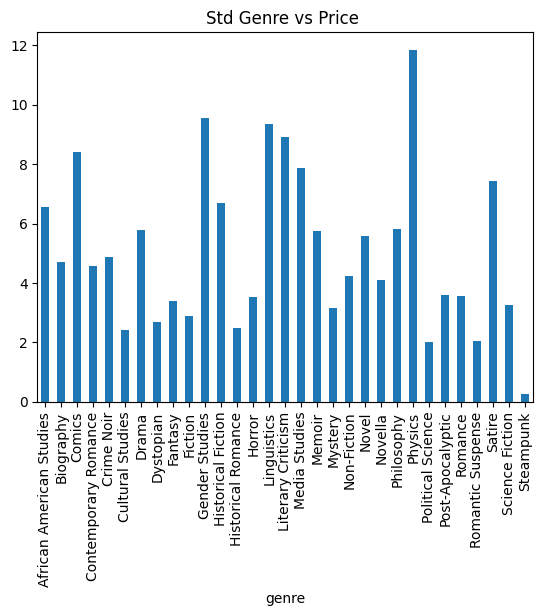

In [119]:
relation_g_p = df.groupby('genre')["price"].std()
relation_g_p = relation_g_p.sort_index()
relation_g_p.plot.bar()
plt.title('Std Genre vs Price ')
plt.show()

## Author and Price

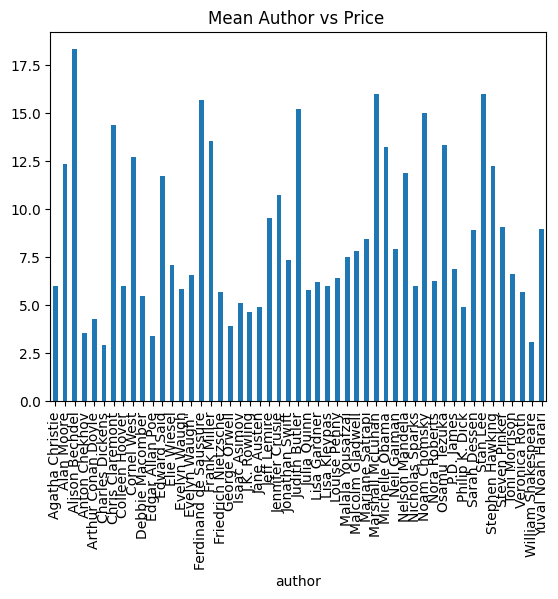

In [120]:
relation_a_p = df.groupby('author')["price"].mean()
relation_a_p = relation_a_p.sort_index()
relation_a_p.plot.bar()
plt.title('Mean Author vs Price ')
plt.show()


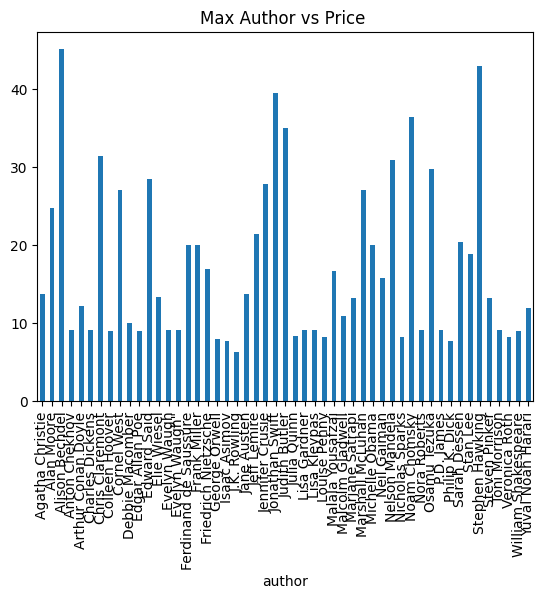

In [121]:

relation_a_p = df.groupby('author')["price"].max()
relation_a_p = relation_a_p.sort_index()
relation_a_p.plot.bar()
plt.title('Max Author vs Price ')
plt.show()

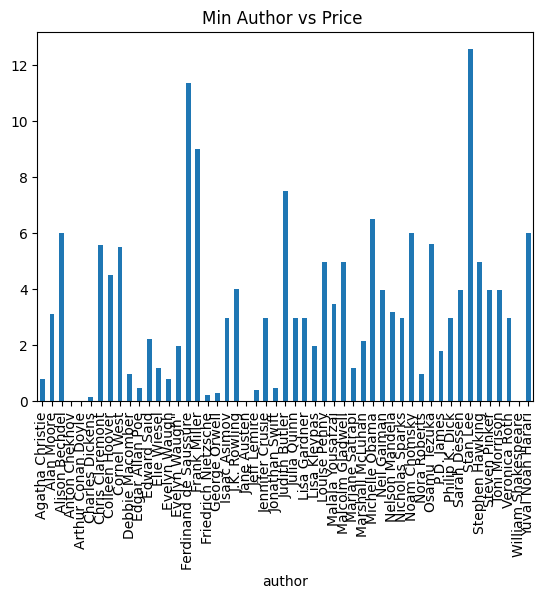

In [122]:
relation_a_p = df.groupby('author')["price"].min()
relation_a_p = relation_a_p.sort_index()
relation_a_p.plot.bar()
plt.title('Min Author vs Price ')
plt.show()

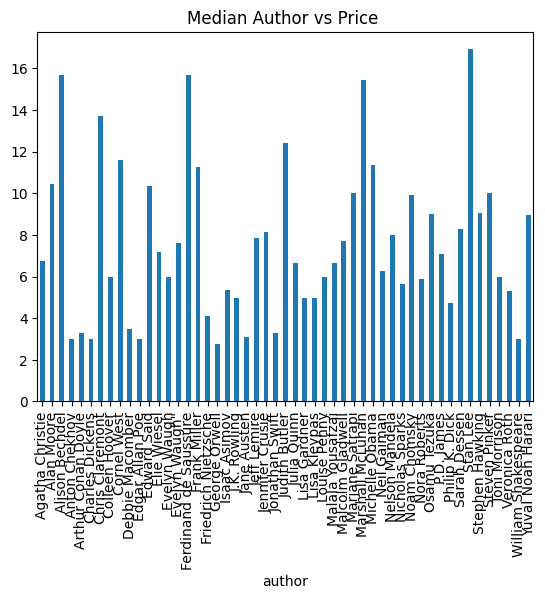

In [123]:
relation_a_p = df.groupby('author')["price"].median()
relation_a_p = relation_a_p.sort_index()
relation_a_p.plot.bar()
plt.title('Median Author vs Price ')
plt.show()

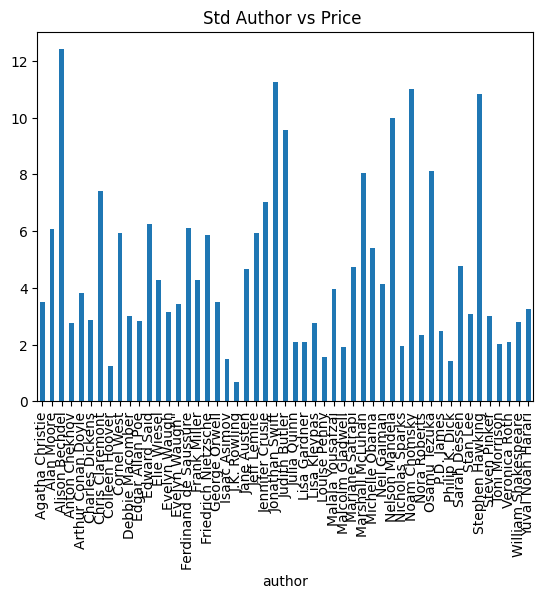

In [124]:
relation_a_p = df.groupby('author')["price"].std()
relation_a_p = relation_a_p.sort_index()
relation_a_p.plot.bar()
plt.title('Std Author vs Price ')
plt.show()

## Publisher and Price

In [125]:
relation_p_p = df.groupby(['publisher','genre'])["price"].mean().head(50)
relation_p_p = relation_p_p.sort_index().sort_values(ascending=False)
#relation_p_p.plot.bar(figsize=(16, 10))
#plt.show()

'''
relation_p_p = df.groupby('publisher')["price"].max()
relation_p_p = relation_p_p.sort_index()
relation_p_p.plot.bar()
plt.show()

relation_p_p = df.groupby('publisher')["price"].min()
relation_p_p = relation_p_p.sort_index()
relation_p_p.plot.bar()
plt.show()

relation_p_p = df.groupby('publisher')["price"].median()
relation_p_p = relation_p_p.sort_index()
relation_p_p.plot.bar()
plt.show()

relation_p_p = df.groupby('publisher')["price"].std()
relation_p_p = relation_p_p.sort_index()
relation_p_p.plot.bar()
plt.show()'''

pd.DataFrame(relation_p_p)

price
publisher                   genre                          
Cambridge University Press  Linguistics               31.19
Dark Horse Manga            Science Fiction           20.49
Crown Publishing            Non-Fiction               19.95
Bantam Books                Physics                   18.39
Beach Lane Books            Memoir                    16.67
Duckworth                   Linguistics               15.67
Dark Horse Comics           Historical Fiction        15.47
                            Crime Noir                15.44
Bloomsbury                  Non-Fiction               14.19
Castle Point Books          Biography                 13.24
DC Comics                   Dystopian                 12.67
Beacon Press                Media Studies             12.08
DC Comics                   Fantasy                   12.04
                            Comics                    11.51
Aakar Books                 Philosophy                11.50
Charlesbridge Publishing    Memoir                    10.99
Beacon Press                African American Studies  10.91
Bloomsbury                  Literary Criticism         9.51
DC Comics                   Steampunk                  9.36
                            Horror                     9.30
Bantam                      Contemporary Romance       8.93
Abacus                      Non-Fiction                8.49
Dark Horse Comics           Comics                     8.31
Bison Books                 Philosophy                 8.23
Bantam Books                Biography                  7.82
Bloomsbury Publishing PLC   Fantasy                    7.35
Abacus                      Memoir                     6.99
Corgi                       Fantasy                    6.99
Dover Publications Inc      Novel                      6.49
Avon                        Historical Romance         6.28
Dover Publications Inc      Philosophy                 5.54
Books on Demand             Mystery                    4.92
Cornerstone Digital         Contemporary Romance       4.67
Bloomsbury Children's Books Fantasy                    4.67
Classica Libris             Fiction                    4.17
BookRix                     Mystery                    3.59
Digireads                   Drama                      3.58
CDED                        Mystery                    3.25
Blurb                       Satire                     3.14
CreateSpace Independent     Drama                      2.99
Dover Publications Inc      Drama                      2.99
CreateSpace Independent     Horror                     2.32
Bloomsbury Publishing PLC   Novel                      1.20
Avarang Books               Satire                     0.81
Aegitas                     Satire                     0.81
Dover Publications          Drama                      0.49
E-BOOKARAMA                 Drama                      0.49
                            Fiction                    0.49
                            Satire                     0.49
DGrapevine                  Drama                      0.24

## Version and Price

In [126]:
#df.query("version=='English'")

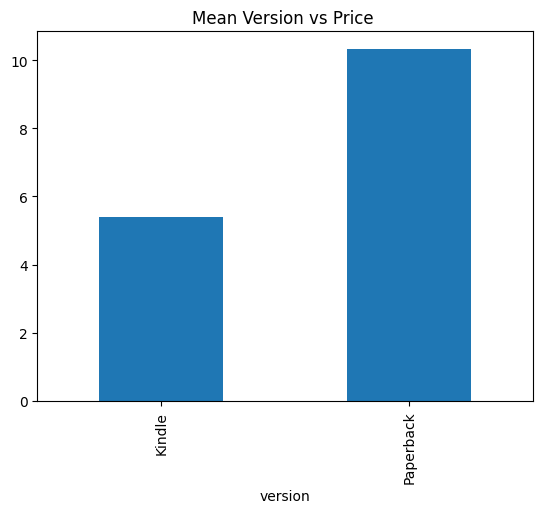

In [127]:
relation_v_p = df.groupby('version')["price"].mean()
relation_v_p = relation_v_p.sort_index()
relation_v_p.plot.bar()
plt.title('Mean Version vs Price ')
plt.show()



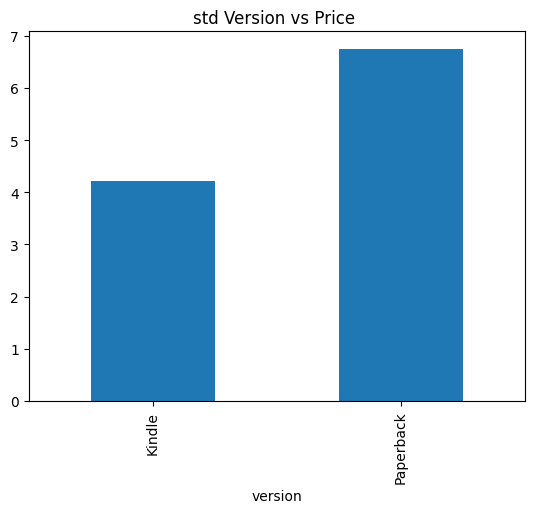

In [128]:
relation_v_p = df.groupby('version')["price"].std()
relation_v_p = relation_v_p.sort_index()
relation_v_p.plot.bar()
plt.title('std Version vs Price ')
plt.show()


# Modelling

## Dataset split
Separa autores de treinamento e teste _não pode estar nos dois datasets_

In [129]:
from sklearn.preprocessing import OneHotEncoder
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split


In [130]:
# df.genre.to_frame().shape


In [131]:
#enc = OneHotEncoder(handle_unknown='ignore')
# enc.fit(df.genre.to_frame())


In [132]:
#genre_onehot = pd.DataFrame.sparse.from_spmatrix(enc.transform(df.genre.to_frame()))


In [133]:
df.genre.value_counts().shape


(31,)

In [134]:
one_hot_genre = pd.get_dummies(df['genre'], prefix='genre')
one_hot_publisher = pd.get_dummies(df['publisher'], prefix='publisher')
one_hot_version = pd.get_dummies(df['version'], prefix='version')


In [135]:
df_dropped = df.drop(
    columns=['title', 'genre', 'publisher', 'version', 'language'])
X = pd.concat([df_dropped, one_hot_genre,
              one_hot_publisher, one_hot_version], axis=1)
y = df.price.copy()
X

,author,num_pages,year,price,genre_African American Studies,genre_Biography,genre_Comics,genre_Contemporary Romance,genre_Crime Noir,genre_Cultural Studies,...,publisher_W. W. Norton & Company,publisher_WS,publisher_Westminster John Knox Press,publisher_William Collins,publisher_Wired Books,publisher_Wordsworth Editions,publisher_Wren & Rook,publisher_yons Press,version_Kindle,version_Paperback
0,Jane Austen,4482,2003,2.49,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Jane Austen,4482,2003,0.75,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,Jane Austen,368,2003,7.35,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Jane Austen,368,2003,0.75,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Jane Austen,512,2015,10.99,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Charles Dickens,789,2023,2.99,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
596,Charles Dickens,70,2016,6.30,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
597,Charles Dickens,120,2016,0.49,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
598,Charles Dickens,384,2012,2.99,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [136]:
for c in X.corr().price:
    print(c)

-0.02640834813792235
-0.24686997691254273
1.0
0.10063814150927652
0.0708912338407961
0.2647981323107797
-0.0421783044094171
0.11809570649314699
0.038914987289974196
-0.12010031352551657
-0.0623989385704363
-0.0577727095655929
-0.06589479924063273
0.1687575403362334
0.0983434992627598
-0.06819331471732261
-0.09378971272712289
0.15716221898450933
0.08658576803310492
0.15239250757583625
0.0289579355875825
-0.11130059842722011
0.011492057328212724
-0.07346755091197153
-0.0436600468310981
-0.04478216459869836
0.10071189361654047
0.014963950189338182
0.06888081347149057
-0.09386395804462368
-0.052834380212585345
-0.06278654971196729
-0.09088860066314228
0.009992615264578156
0.022215990650614702
-0.004812681472976194
-0.04777023936335499
-0.047770239363355
-0.02936221676023595
0.007583342009850005
0.10888965121904604
0.0560634003018985
0.051452455048270875
0.0011895014492254148
0.049138007282180034
-0.09406332683669158
-0.03550558350740295
-0.04602298790785068
-0.041853091890052
-0.0295287325

In [137]:
'''corr_columns = X.corr().query('price>=0.05').index
X = X.loc[:,['author']+corr_columns.to_list()]
X'''

"corr_columns = X.corr().query('price>=0.05').index\nX = X.loc[:,['author']+corr_columns.to_list()]\nX"

# Training preprocessing

## Author split

In [138]:
np.random.seed(42)
authors = df.author.unique()
train_arr = np.random.choice(authors, size = (int(0.8*len(authors))),replace=False)

test_arr = np.setdiff1d(authors,train_arr)
print(authors.shape,train_arr.shape,test_arr.shape)
print(train_arr)
test_arr

(51,) (40,) (11,)
['Edgar Allan Poe' 'Anton Chekhov' 'Jonathan Swift' 'J.K. Rowling'
 'Stan Lee' 'Alison Bechdel' 'Yuval Noah Harari' 'Osamu Tezuka'
 'Nora Roberts' 'Jeff Lemire' 'Arthur Conan Doyle' 'Sarah Dessen'
 'Marshall McLuhan' 'Jennifer Crusie' 'Steven Pinker' 'Lisa Kleypas'
 'P.D. James' 'Malala Yousafzai' 'Noam Chomsky' 'Friedrich Nietzsche'
 'George Orwell' 'Debbie Macomber' 'Louise Penny' 'Alan Moore'
 'Evelyn Waugh' 'Frank Miller' 'Malcolm Gladwell' 'Jane Austen'
 'Evelyn Waugh"' 'Chris Claremont' 'Nelson Mandela' 'Lisa Gardner'
 'Marjane Satrapi' 'Veronica Roth' 'Nicholas Sparks' 'Stephen Hawking'
 'Julia Quinn' 'William Shakespeare' 'Elie Wiesel' 'Edward Said']


array(['Agatha Christie', 'Charles Dickens', 'Colleen Hoover',
       'Cornel West', 'Ferdinand de Saussure', 'Isaac Asimov',
       'Judith Butler', 'Michelle Obama', 'Neil Gaiman', 'Philip K. Dick',
       'Toni Morrison'], dtype=object)

In [139]:
train = X.loc[X.author.isin(train_arr),:]
train

,author,num_pages,year,price,genre_African American Studies,genre_Biography,genre_Comics,genre_Contemporary Romance,genre_Crime Noir,genre_Cultural Studies,...,publisher_W. W. Norton & Company,publisher_WS,publisher_Westminster John Knox Press,publisher_William Collins,publisher_Wired Books,publisher_Wordsworth Editions,publisher_Wren & Rook,publisher_yons Press,version_Kindle,version_Paperback
0,Jane Austen,4482,2003,2.49,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Jane Austen,4482,2003,0.75,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,Jane Austen,368,2003,7.35,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Jane Austen,368,2003,0.75,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Jane Austen,512,2015,10.99,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582,Marshall McLuhan,157,1967,22.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
583,Marshall McLuhan,342,2021,2.16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
584,Marshall McLuhan,267,1969,13.86,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
585,Marshall McLuhan,240,1992,13.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [140]:
test = X.loc[X.author.isin(test_arr),:]
test

,author,num_pages,year,price,genre_African American Studies,genre_Biography,genre_Comics,genre_Contemporary Romance,genre_Crime Noir,genre_Cultural Studies,...,publisher_W. W. Norton & Company,publisher_WS,publisher_Westminster John Knox Press,publisher_William Collins,publisher_Wired Books,publisher_Wordsworth Editions,publisher_Wren & Rook,publisher_yons Press,version_Kindle,version_Paperback
98,Colleen Hoover,384,2016,5.00,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
99,Colleen Hoover,384,2016,4.99,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
100,Colleen Hoover,352,2015,4.50,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
101,Colleen Hoover,352,2015,5.99,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
102,Colleen Hoover,352,2014,5.99,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,Charles Dickens,789,2023,2.99,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
596,Charles Dickens,70,2016,6.30,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
597,Charles Dickens,120,2016,0.49,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
598,Charles Dickens,384,2012,2.99,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


## Train test split

In [141]:
X_train, X_test, y_train, y_test = train.drop(columns = ['author','price']).copy(), test.drop(columns = ['author','price']).copy(),train.price.copy(),test.price.copy()


In [142]:
X_train.shape,X_test.shape

((467, 162), (133, 162))

## PCA

In [143]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca = PCA(50)
X_standard_scale = StandardScaler().fit_transform(X_train)
pca.fit(X_standard_scale)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)



In [144]:
#X_standard_scale

## LazyPredict

In [145]:
clf = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

models

100%|██████████| 42/42 [00:05<00:00,  7.53it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 172
[LightGBM] [Info] Number of data points in the train set: 467, number of used features: 16
[LightGBM] [Info] Start training from score 8.151220
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,97826547548392789423054567891795968.00,-22233306260998360394024034806792192.00,861611858056242944.00,0.03
TransformedTargetRegressor,107764350690256789424572465152.00,-24491897884149269524121649152.00,904317347946396.88,0.03
LinearRegression,107764350690256789424572465152.00,-24491897884149269524121649152.00,904317347946396.88,0.03
RANSACRegressor,12495501574344963650620489728.00,-2839886721442037143345037312.00,307935777788283.44,1.21
GaussianProcessRegressor,22.71,-3.93,12.84,0.05
KernelRidge,12.73,-1.67,9.43,0.02
LassoCV,8.95,-0.81,7.77,0.19
DecisionTreeRegressor,8.86,-0.79,7.72,0.02
XGBRegressor,7.81,-0.55,7.19,0.04


# Modelling and training

In [146]:
from sklearn.linear_model import HuberRegressor
from sklearn.svm import LinearSVR
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

### Hubber Model

In [147]:
huber = HuberRegressor().fit(X_train, y_train)
pred_hubber = huber.predict(X_test)
print(pred_hubber)


[ 9.50889315  5.1552926   9.50071879  5.14711824  9.49694286  5.14334232
  9.49632035  5.1427198   9.49756538  5.14396483  9.50037914  5.1467786
  9.50196382  5.14836327  7.76081248  3.40721193  7.70911391  3.35551336
  7.70581508  3.35221453  7.70925136  3.35565081  7.70911391  3.35551336
  7.70072938  3.34712884  7.7136498   3.36004925  8.61450398  4.26090343
  9.57928304 10.13304942  5.77944887 12.28489648 10.81668015  6.46307961
 10.84309567  6.48949512  9.62914425  5.30197517  9.60835627  5.31049714
  9.57419565  9.63234645  9.57536797  5.28012042  9.5932934   5.2835567
  9.59673765  5.28467226  9.62760837  5.27208351  9.94668735  9.9632303
  9.96556697  5.60962975  9.98855417  5.63124244  9.94133473  5.58773418
  9.90665619  9.97784892  5.62218661  9.99672854  5.63948952 10.02520314
  5.66920118  9.93851299  5.58491244 10.01150056  5.65790001 10.03256874
  5.67532972  7.62945966  7.56149305 11.31772469  7.01726197 10.41251003
  6.33017694  6.76164954  2.4085988   7.91342106  4.40

In [148]:
huber_pca = HuberRegressor().fit(X_train_pca, y_train)
pred_hubber_pca = huber_pca.predict(X_test_pca)
print(pred_hubber)

[ 9.50889315  5.1552926   9.50071879  5.14711824  9.49694286  5.14334232
  9.49632035  5.1427198   9.49756538  5.14396483  9.50037914  5.1467786
  9.50196382  5.14836327  7.76081248  3.40721193  7.70911391  3.35551336
  7.70581508  3.35221453  7.70925136  3.35565081  7.70911391  3.35551336
  7.70072938  3.34712884  7.7136498   3.36004925  8.61450398  4.26090343
  9.57928304 10.13304942  5.77944887 12.28489648 10.81668015  6.46307961
 10.84309567  6.48949512  9.62914425  5.30197517  9.60835627  5.31049714
  9.57419565  9.63234645  9.57536797  5.28012042  9.5932934   5.2835567
  9.59673765  5.28467226  9.62760837  5.27208351  9.94668735  9.9632303
  9.96556697  5.60962975  9.98855417  5.63124244  9.94133473  5.58773418
  9.90665619  9.97784892  5.62218661  9.99672854  5.63948952 10.02520314
  5.66920118  9.93851299  5.58491244 10.01150056  5.65790001 10.03256874
  5.67532972  7.62945966  7.56149305 11.31772469  7.01726197 10.41251003
  6.33017694  6.76164954  2.4085988   7.91342106  4.40

###  MLP Regressor

In [149]:
regr_mlp = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
pred_mlp = regr_mlp.predict(X_test)
#print(pred_mlp) 
pd.DataFrame({'pred':pred_mlp,'real':y_test})

,pred,real
98,11.46,5.00
99,6.96,4.99
100,11.60,4.50
101,7.09,5.99
102,11.59,5.99
...,...,...
595,12.05,2.99
596,7.40,6.30
597,4.93,0.49
598,9.53,2.99


### Adaboost Model

In [150]:
X_test.shape

(133, 162)

In [151]:
regr_adaboost = AdaBoostRegressor(random_state=0, n_estimators=100)
regr_adaboost.fit(X_train, y_train)
pred_adaboost = regr_adaboost.predict(X_test)
pred_adaboost

array([13.77527027,  5.87223881, 13.77527027,  5.87223881, 13.77527027,
        5.87223881, 13.77527027,  5.87223881, 13.77527027,  5.87223881,
       13.77527027,  5.87223881, 13.77527027,  5.87223881, 13.77527027,
        5.87223881, 14.77      , 12.32940447, 14.77      , 12.32940447,
       14.77      , 12.32940447, 14.77      , 12.32940447, 14.77      ,
       12.32940447, 14.77      , 12.32940447, 13.77527027,  5.87223881,
       13.77527027, 13.77527027,  5.87223881, 13.77527027, 14.77      ,
       12.32940447, 12.32940447,  5.46273585, 14.77      ,  5.87223881,
       15.14337629,  5.87223881, 14.77      , 12.87958904, 15.14337629,
        5.46273585, 14.7782    ,  5.87223881, 15.14337629, 12.32940447,
       12.87958904,  5.46273585, 14.77      , 13.77527027, 13.77527027,
        5.87223881, 12.87958904,  5.46273585, 14.77      , 12.32940447,
       15.14337629, 13.77527027,  5.87223881, 13.77527027,  5.87223881,
       12.32940447,  5.46273585, 14.77      , 12.32940447, 13.77

### SGD Model

In [152]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

reg_SGD = make_pipeline(StandardScaler(),
                     SGDRegressor(max_iter=50, tol=1e-3)).fit(X_train,y_train)


pred_SGD = reg_SGD.predict(X_test)
print(pred_SGD)

[ 9.54388653  5.06944675  9.61974278  5.14530301  9.69433056  5.21989079
  9.62101126  5.14657148  9.76764986  5.29321009  9.69333956  5.21889979
  9.76638139  5.29194161  8.37067883  3.89623905  9.34107311  4.86663333
  9.34202446  4.86758469  9.34103347  4.86659369  9.34107311  4.86663333
  9.34349114  4.86905136  9.33976499  4.86532522  7.85355109  3.37911131
 11.40913052 10.07921814  5.60477836 12.40875292 12.46374046  7.98930069
 11.64763528  7.17319551  8.96421231  3.96765808  9.63169689  3.96520041
  9.56804971  8.448797    9.64121046  3.97396083  9.41554441  3.97296983
  9.56154877  4.26664344  8.52366226  4.04977744 10.62736005 10.25509504
 10.25442116  5.78065526  9.58630235  5.11293285 10.77590137  6.3014616
 11.30039421  9.88338498  5.40953981  9.51044609  5.11055445 13.98571288
  9.58546448 10.70321631  6.22877653  9.43268712  4.95824735 14.20408519
  9.80419355 10.70167616 12.04425617 11.84987832  6.33113037 11.24901311
  8.70038721  7.20304713  2.72844879  7.95556367  4.

### LinearSVR

In [153]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
regr_SVR = make_pipeline(StandardScaler(),
                         LinearSVR(dual="auto", random_state=0, tol=1e-4,C=.9)).fit(X_train,y_train)

pred_linearsvr = regr_SVR.predict(X_test)
print(pred_linearsvr)


[ 9.16771411  5.6689237   9.21475093  5.71596051  9.26184384  5.76305342
  9.21469483  5.71590441  9.30899284  5.81020242  9.26188766  5.76309724
  9.30904894  5.81025852  8.9806177   5.48182728  9.59279222  6.0940018
  9.59275015  6.09395973  9.59279397  6.09400355  9.59279222  6.0940018
  9.59268528  6.09389487  9.59285007  6.09405965  8.22322365  4.72443324
 10.07094012 11.11580085  7.61701044 14.61636282 13.98776497 10.48897456
 13.46955014  9.97075972  9.64750911  5.81906832 10.07151358  5.81917701
 10.02393684  9.31756248 10.07109286  5.81878959  9.92989827  5.81883342
 10.02422434  6.00741191  9.36464312  5.86582816  9.40434068  9.16884633
  9.16887613  5.67005591  8.7448997   5.24606195  9.49855455  5.99976413
  9.82809973  8.93332744  5.43451072  8.69786289  5.24616713  6.30175958
  2.8500796   9.45137749  5.95258707  8.65091022  5.1521198   6.44327672
  2.99158096  8.22731469  9.07498707 10.83309727  6.67500962 11.03076819
 10.77380746  6.3372767   2.83849329  6.62154431  3.8

In [154]:
pd.DataFrame({'pred':pred_linearsvr,'real':y_test})


,pred,real
98,9.17,5.00
99,5.67,4.99
100,9.21,4.50
101,5.72,5.99
102,9.26,5.99
...,...,...
595,7.64,2.99
596,4.17,6.30
597,0.67,0.49
598,6.51,2.99


### Random Forest Regressor


In [155]:
regr = RandomForestRegressor(n_estimators=3,
                             max_depth=4, ccp_alpha=.5, random_state=20)
regr_random_forest = regr.fit(X_train, y_train)
pred_random_forest = regr.predict(X_test)


In [156]:
pd.DataFrame({'pred':pred_random_forest,'real':y_test})

,pred,real
98,9.38,5.00
99,4.83,4.99
100,9.38,4.50
101,4.83,5.99
102,9.38,5.99
...,...,...
595,4.83,2.99
596,9.38,6.30
597,3.73,0.49
598,9.38,2.99


In [157]:
pd.DataFrame({
              'Hubber': pred_hubber,
              'MLP': pred_mlp,
              'Adaboost': pred_adaboost,
              'SGD': pred_SGD,
              'LinearSVR':pred_linearsvr,
              'RandomForest': pred_random_forest,
              'y_true':y_test}).head(25)

,Hubber,MLP,Adaboost,SGD,LinearSVR,RandomForest,y_true
98,9.51,11.46,13.78,9.54,9.17,9.38,5.00
99,5.16,6.96,5.87,5.07,5.67,4.83,4.99
100,9.50,11.60,13.78,9.62,9.21,9.38,4.50
101,5.15,7.09,5.87,5.15,5.72,4.83,5.99
102,9.50,11.59,13.78,9.69,9.26,9.38,5.99
103,5.14,7.09,5.87,5.22,5.76,4.83,5.99
104,9.50,11.74,13.78,9.62,9.21,9.38,8.99
105,5.14,7.24,5.87,5.15,5.72,4.83,5.99
106,9.50,11.45,13.78,9.77,9.31,9.38,5.00
107,5.14,6.95,5.87,5.29,5.81,4.83,5.99


# Evaluation

In [158]:
from sklearn.metrics import mean_squared_error as mse,mean_absolute_error as mae,r2_score as r2

### Hubber Evaluation

In [159]:
mse_hubber = mse(y_test, pred_hubber)
print(mse_hubber)
mae_hubber = mae(y_test, pred_hubber)
print(mae_hubber)
r2_hubber = r2(y_test, pred_hubber)
print(r2_hubber)

29.274795570864544
3.5667637868208715
0.12325239809328858


In [160]:
mse_hubber_pca = mse(y_test, pred_hubber_pca)
print(mse_hubber_pca)
mae_hubber_pca = mae(y_test, pred_hubber_pca)
print(mae_hubber_pca)

30.038205151827384
3.6143913254393145


### MLP Evaluation

In [161]:
mse_mlp = mse(y_test, pred_mlp)
print(mse_mlp)
mae_mlp = mae(y_test, pred_mlp)
print(mae_mlp)
r2_mlp = r2(y_test, pred_mlp)
print(r2_mlp)

35.97654461381612
4.513697341116428
-0.0774575398383075


### Adaboost Evaluation

In [162]:
mse_adaboost = mse(y_test, pred_adaboost)
print(mse_adaboost)
mae_adaboost = mae(y_test, pred_adaboost)
print(mae_adaboost)
r2_adaboost = r2(y_test, pred_adaboost)
print(r2_adaboost)

47.111362477078224
5.719014035107287
-0.4109329636256909


### SGD Evaluation

In [163]:
mse_SGD = mse(y_test, pred_SGD)
print(mse_SGD)
mae_SGD = mae(y_test, pred_SGD)
print( mae_SGD)
r2_SGD = r2(y_test, pred_SGD)
print(r2_SGD)

38.4097248766486
4.405488380949451
-0.15032858535188431


### LinearSVR Evaluation

In [164]:
mse_linearSVR = mse(y_test, pred_linearsvr)
print(mse_linearSVR)
mae_linearSVR = mae(y_test, pred_linearsvr)
print( mae_linearSVR)
r2_linearSVR = r2(y_test, pred_linearsvr)
print(r2_linearSVR)

39.635913047601456
4.526535945714592
-0.18705155872899737


### Randon Forest Evaluation

In [165]:
mse_randomforest = mse(y_test, pred_random_forest)
print(mse_randomforest)
mae_randomforest = mae(y_test, pred_random_forest)
print( mae_randomforest)
r2_randomforest = r2(y_test, pred_random_forest)
print(r2_randomforest)

30.953278809942336
3.7046418769989278
0.07298368994331039


In [166]:
pd.DataFrame({
              'mse_hubber': mse_hubber,
              'mae_hubber':mae_hubber,
              'r2_hubber':r2_hubber,
              'mse_mlp': mse_mlp,
              'mae_mlp':mae_mlp,
              'r2_mlp':r2_mlp,
              'mse_adaboost': mse_adaboost,
              'mae_adaboost':mae_adaboost,
              'r2_adaboost':r2_adaboost,
              'y_true':y_test}).head(1)



,mse_hubber,mae_hubber,r2_hubber,mse_mlp,mae_mlp,r2_mlp,mse_adaboost,mae_adaboost,r2_adaboost,y_true
98,29.27,3.57,0.12,35.98,4.51,-0.08,47.11,5.72,-0.41,5.00


In [167]:
pd.DataFrame({
              'mse_SGD': mse_SGD,
              'mae_SGD':mae_SGD,
              'r2_SGD':r2_SGD,
              'mse_linearSVR': mse_linearSVR,
              'mae_linearSVR':mae_linearSVR,
              'r2_linearSVR':r2_linearSVR,
              'mse_randomforest': mse_randomforest,
              'mae_randomforest':mae_randomforest,
              'r2_randomforest':r2_randomforest,
              'y_true':y_test}).head(1)

,mse_SGD,mae_SGD,r2_SGD,mse_linearSVR,mae_linearSVR,r2_linearSVR,mse_randomforest,mae_randomforest,r2_randomforest,y_true
98,38.41,4.41,-0.15,39.64,4.53,-0.19,30.95,3.70,0.07,5.00


In [168]:
pd.DataFrame({
            'mse_hubber': mse_hubber,
            'mse_mlp': mse_mlp,
            'mse_adaboost': mse_adaboost,
            'mse_SGD': mse_SGD,
            'mse_linearSVR': mse_linearSVR,
            'mse_randomforest': mse_randomforest,
            'y_true':y_test}).head(1)

,mse_hubber,mse_mlp,mse_adaboost,mse_SGD,mse_linearSVR,mse_randomforest,y_true
98,29.27,35.98,47.11,38.41,39.64,30.95,5.00


In [169]:
pd.DataFrame({
            'mae_hubber': mae_hubber,
            'mae_mlp': mae_mlp,
            'mae_adaboost': mae_adaboost,
            'mae_SGD': mae_SGD,
            'mae_linearSVR': mae_linearSVR,
            'mae_randomforest': mae_randomforest,
            'y_true':y_test}).head(1)

,mae_hubber,mae_mlp,mae_adaboost,mae_SGD,mae_linearSVR,mae_randomforest,y_true
98,3.57,4.51,5.72,4.41,4.53,3.70,5.00


In [170]:
pd.DataFrame({
            'r2_hubber': r2_hubber,
            'r2_mlp': r2_mlp,
            'r2_adaboost': r2_adaboost,
            'r2_SGD': r2_SGD,
            'r2_linearSVR': r2_linearSVR,
            'r2_randomforest': r2_randomforest,
            'y_true':y_test}).head(1)

,r2_hubber,r2_mlp,r2_adaboost,r2_SGD,r2_linearSVR,r2_randomforest,y_true
98,0.12,-0.08,-0.41,-0.15,-0.19,0.07,5.00
